In [1]:
# First load some libraries, including History Matching
%load_ext autoreload
%autoreload 2
import re, os
from history_matching import HistoryMatching, HistoryMatchingCut, quick_read, Basis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pycuda

sns.set(font_scale=3)
sns.set_style("white")

C:\conda\envs\history_matching\lib\site-packages\skcuda\cublas.py:284: UserWarning: creating CUBLAS context to get version number
  warnings.warn('creating CUBLAS context to get version number')


## Select samples for the next iteration
Now that the emulators are fit, it's time to select samples for the next iteration.
Here we use a class called HistoryMatchingCut.  It's job is to conduct rejection sampling in order to find n_samples_per_iteration new samples that are not implausible with respect to the emulation on this wave or any previous wave.  Resulting samples are saved to disk, so we'll load them in just to make a plot.

In [2]:
iteration = int(re.search(r'iter(\d+)', os.getcwd()).group(1)) # Index of the current iteration
n_samples_to_generate_for_next_iter = 200 # Number of simulations to conduct on this iteration
params_file = os.path.join('..', 'Params.xlsx')
param_info = quick_read(params_file, 'Params').set_index('Name')

Reading Params from ..\Params_c686920dee8501a26fe576ed61915351.hd5


In [3]:
### Cut #######################################################################
print("="*80, "\nCut\n", "="*80)
###############################################################################
# History Matching!
hmc = HistoryMatchingCut(
    cut_dir = 'Cuts',
    iteration = int(re.search(r'iter(\d+)', os.getcwd()).group(1))
)

(_, rejected_percent) = hmc.cut(num_desired_candidates=n_samples_to_generate_for_next_iter, constraint = None)

Cut
Reading iteration 1 . cut 50_28_W2_Sugungum
Welcome to IDM History Matching!
Found 998 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 748 unique parameter configurations ( 748  simulations including replicates)
--> Testing  with 250  unique parameter configurations ( 250 simulations including replicates)
	 Desired Result: 0.9371069182389937
	 Desired Result Var: 0
	 Discrepancy Var: 0
	 Imp Thresh: 3
Using Poisson family
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sim_Result   No. Observations:                  748
Model:                            GLM   Df Residuals:                      738
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.05
Date:                Sat, 07 Mar 2020   Deviance:       

(35, 9)
Performing cut: iteration 0 , cut 50_8_W2_Sugungum


c:\git\history_matching\history_matching\HistoryMatchingCut.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Yglm'] = self.glm_all[cut].evaluate(plausible_candidates)
c:\git\history_matching\history_matching\HistoryMatchingCut.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Mean_Estimate'] = plausible_candidates['Yglm'] + ret['Mean']
c:\git\history_matching\history_matching\HistoryMatchingCut.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Test plausibility: 270.34921860694885
Merge plausibility (needed?): 0.001024484634399414
Plausible candidates: New = 12 , Tot = 12
--------------------------------------------------------------------------------
LHS Sampling ( 5000 ): 0.012965917587280273
LHS Scaling: 0.002990245819091797
DataFrame: 0.0009975433349609375
Constraint: 0.0
(5000, 9)
Performing cut: iteration 1 , cut 50_28_W2_Sugungum
(27, 9)
Performing cut: iteration 0 , cut 50_8_W2_Sugungum
Test plausibility: 210.78322792053223
Merge plausibility (needed?): 0.000997781753540039
Plausible candidates: New = 7 , Tot = 19
--------------------------------------------------------------------------------
LHS Sampling ( 5000 ): 0.011972665786743164
LHS Scaling: 0.003983020782470703
DataFrame: 0.0009961128234863281
Constraint: 0.0
(5000, 9)
Performing cut: iteration 1 , cut 50_28_W2_Sugungum
(24, 9)
Performing cut: iteration 0 , cut 50_8_W2_Sugungum
Test plausibility: 207.53193473815918
Merge plausibility (needed?): 0.00199556350

Test plausibility: 476.3802192211151
Merge plausibility (needed?): 0.002981424331665039
Plausible candidates: New = 6 , Tot = 137
--------------------------------------------------------------------------------
LHS Sampling ( 5000 ): 0.032938480377197266
LHS Scaling: 0.008181095123291016
DataFrame: 0.0019905567169189453
Constraint: 0.0
(5000, 9)
Performing cut: iteration 1 , cut 50_28_W2_Sugungum
(28, 9)
Performing cut: iteration 0 , cut 50_8_W2_Sugungum
Test plausibility: 438.63300490379333
Merge plausibility (needed?): 0.003064393997192383
Plausible candidates: New = 7 , Tot = 144
--------------------------------------------------------------------------------
LHS Sampling ( 5000 ): 0.03351545333862305
LHS Scaling: 0.005035877227783203
DataFrame: 0.001990795135498047
Constraint: 0.0
(5000, 9)
Performing cut: iteration 1 , cut 50_28_W2_Sugungum
(19, 9)
Performing cut: iteration 0 , cut 50_8_W2_Sugungum
Test plausibility: 440.41981744766235
Merge plausibility (needed?): 0.0029485225677

C:\conda\envs\history_matching\lib\site-packages\seaborn\axisgrid.py:1270: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
C:\conda\envs\history_matching\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\conda\envs\history_matching\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\conda\envs\history_matching\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\conda\envs\history_matching\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'colo

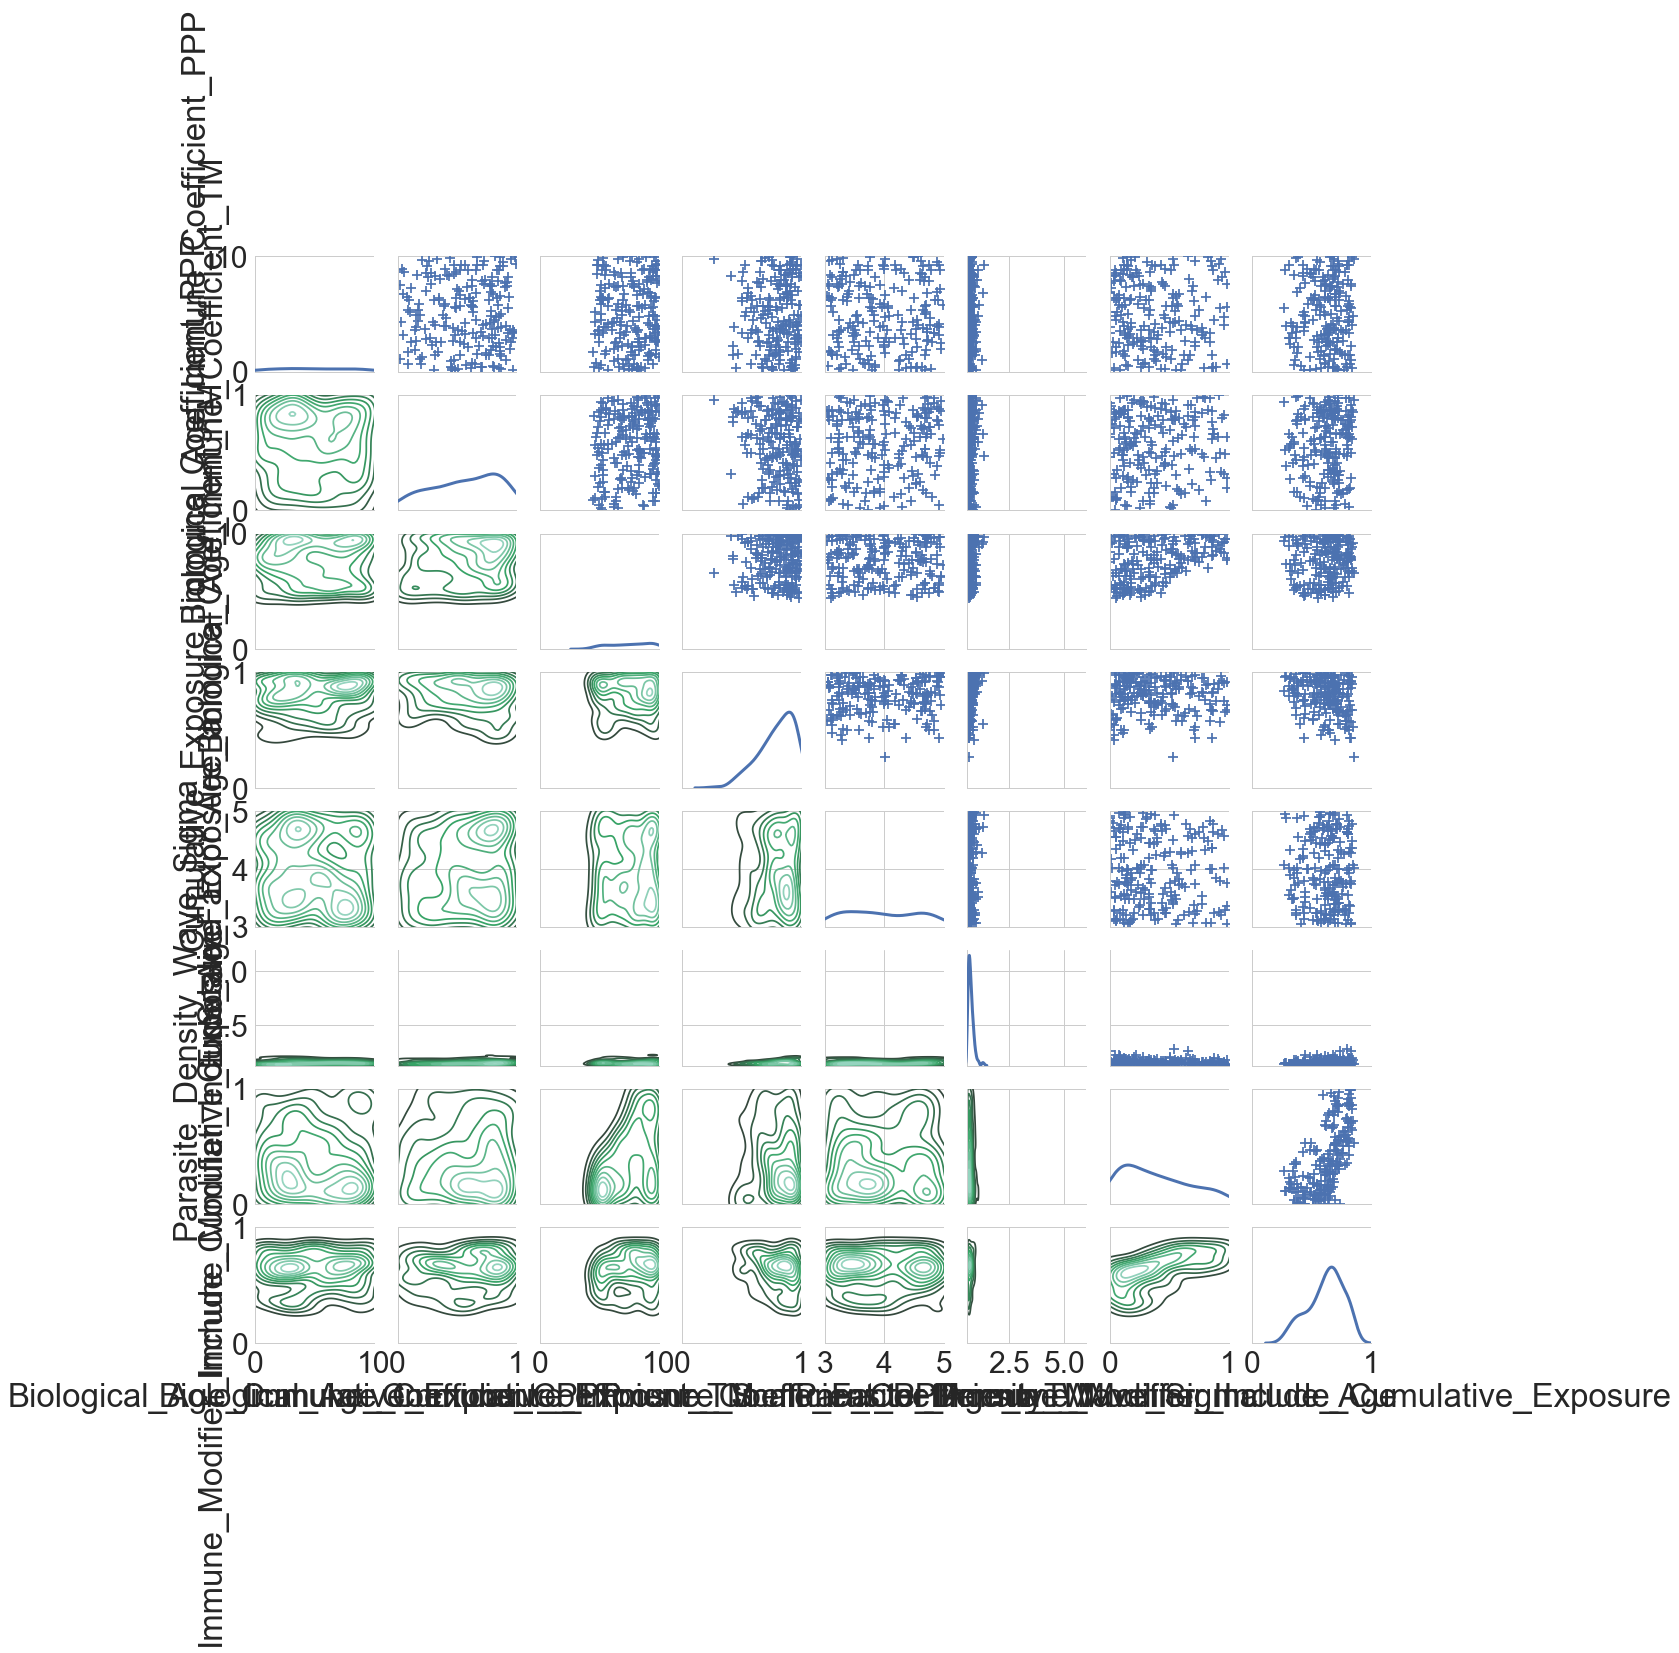

In [4]:
candidates = pd.read_csv('Candidates_for_iter%d.csv'%(iteration+1))

g = sns.PairGrid(candidates)
g.map_upper(plt.scatter, marker='+', linewidths=0.1, s=100)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

names = param_info.index.values.tolist()
for col in range(len(names)):
    for row in range(len(names)):
        if row == col:
            continue
        xvar = names[col]
        yvar = names[row]
        #print('B', col, xvar, yvar, g.axes[row, col].get_xlim(), g.axes[row, col].get_ylim())
        g.axes[row,col].set_xlim( param_info.loc[xvar, ['Min','Max']].values.tolist() )
        g.axes[row,col].set_ylim( param_info.loc[yvar, ['Min','Max']].values.tolist() )